In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

distutils: c:\users\vaibhav gandhi\appdata\local\programs\python\python37\Include\UNKNOWN
sysconfig: c:\users\vaibhav gandhi\appdata\local\programs\python\python37\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\vaibhav gandhi\appdata\local\programs\python\python37\Include\UNKNOWN
sysconfig: c:\users\vaibhav gandhi\appdata\local\programs\python\python37\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\vaibhav gandhi\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('Sign', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.right_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
results

In [9]:
draw_landmarks(frame, results)

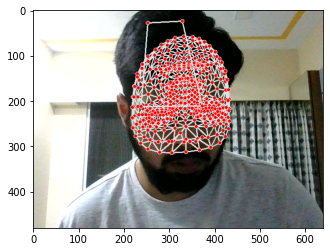

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [11]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.52836549,  0.57681876, -0.97039956, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
468*3+33*4+21*3+21*3

1662

In [ ]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

In [34]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data3') 

# # Actions that we try to detect
actions = np.array(['Cheque', 'Credit', 'Deduct', 'Deposit', 'Loan', 'Passbook','Statement','Transfer','Withdraw'])
# actions1 = np.array(['Cheque'])
# actions2 = np.array(['Transfer'])
# actions3 = np.array(['Statement'])
# actions4 = np.array(['Passbook'])
# actions5 = np.array(['Credit'])
# actions6 = np.array(['Loan'])
# actions7 = np.array(['Deduct'])

# # Thirty videos worth of data
no_sequences = 30

# # Videos are going to be 30 frames in length
sequence_length = 30

In [16]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions7:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [21]:
cap.release()
cv2.destroyAllWindows()

In [35]:
# arr = np.concatenate((actions, actions1))
# arr1 = np.concatenate((actions2, actions3))
# arr2 = np.concatenate((actions4, actions5))
# arr3 = np.concatenate((actions6, actions7))
# arr4 = np.concatenate((arr, arr1))
# arr5 = np.concatenate((arr2, arr3))
# actions = np.concatenate((arr4, arr5))
print(actions)

['Cheque' 'Credit' 'Deduct' 'Deposit' 'Loan' 'Passbook' 'Statement'
 'Transfer' 'Withdraw']


In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
label_map

{'Credit': 0, 'Deposit': 1, 'Loan': 2, 'Transfer': 3}

In [26]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
np.array(sequences).shape

(120, 30, 1662)

In [28]:
np.array(labels).shape

(120,)

In [29]:
X = np.array(sequences)

In [30]:
X.shape

(120, 30, 1662)

In [31]:
y = to_categorical(labels).astype(int)

In [32]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [34]:
y_test.shape

(6, 4)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [18]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [37]:
res = [.7, 0.2, 0.1]

In [38]:
actions[np.argmax(res)]

'Cheque'

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [41]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
4/4 [==============================] - 8s 646ms/step - loss: 1.9457 - categorical_accuracy: 0.2709
Epoch 2/2000
4/4 [==============================] - 1s 149ms/step - loss: 2.0381 - categorical_accuracy: 0.2671
Epoch 3/2000
4/4 [==============================] - 1s 151ms/step - loss: 1.7654 - categorical_accuracy: 0.3029
Epoch 4/2000
4/4 [==============================] - 1s 151ms/step - loss: 1.4848 - categorical_accuracy: 0.3277
Epoch 5/2000
4/4 [==============================] - 1s 148ms/step - loss: 1.4574 - categorical_accuracy: 0.2684
Epoch 6/2000
4/4 [==============================] - 1s 157ms/step - loss: 1.2975 - categorical_accuracy: 0.3234
Epoch 7/2000
4/4 [==============================] - 1s 150ms/step - loss: 1.0526 - categorical_accuracy: 0.6899
Epoch 8/2000
4/4 [==============================] - 1s 150ms/step - loss: 1.1447 - categorical_accuracy: 0.4572
Epoch 9/2000
4/4 [==============================] - 1s 153ms/step - loss: 1.0812 - categorical_accuracy:

Epoch 73/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.0397e-04 - categorical_accuracy: 1.0000
Epoch 74/2000
4/4 [==============================] - 1s 151ms/step - loss: 1.4460e-04 - categorical_accuracy: 1.0000
Epoch 75/2000
4/4 [==============================] - 1s 148ms/step - loss: 1.2179e-04 - categorical_accuracy: 1.0000
Epoch 76/2000
4/4 [==============================] - 1s 147ms/step - loss: 1.0430e-04 - categorical_accuracy: 1.0000
Epoch 77/2000
4/4 [==============================] - 1s 150ms/step - loss: 7.8555e-05 - categorical_accuracy: 1.0000
Epoch 78/2000
4/4 [==============================] - 1s 160ms/step - loss: 1.0293e-04 - categorical_accuracy: 1.0000
Epoch 79/2000
4/4 [==============================] - 1s 171ms/step - loss: 1.0360e-04 - categorical_accuracy: 1.0000
Epoch 80/2000
4/4 [==============================] - 1s 160ms/step - loss: 7.0359e-05 - categorical_accuracy: 1.0000
Epoch 81/2000
4/4 [==============================] - 1s 166ms/st

4/4 [==============================] - 1s 151ms/step - loss: 1.0253e-05 - categorical_accuracy: 1.0000
Epoch 143/2000
4/4 [==============================] - 1s 147ms/step - loss: 1.1484e-05 - categorical_accuracy: 1.0000
Epoch 144/2000
4/4 [==============================] - 1s 148ms/step - loss: 1.6687e-05 - categorical_accuracy: 1.0000
Epoch 145/2000
4/4 [==============================] - 1s 146ms/step - loss: 8.9010e-06 - categorical_accuracy: 1.0000
Epoch 146/2000
4/4 [==============================] - 1s 146ms/step - loss: 8.3541e-06 - categorical_accuracy: 1.0000
Epoch 147/2000
4/4 [==============================] - 1s 144ms/step - loss: 8.0456e-06 - categorical_accuracy: 1.0000
Epoch 148/2000
4/4 [==============================] - 1s 140ms/step - loss: 1.3247e-05 - categorical_accuracy: 1.0000
Epoch 149/2000
4/4 [==============================] - 1s 148ms/step - loss: 9.0898e-06 - categorical_accuracy: 1.0000
Epoch 150/2000
4/4 [==============================] - 1s 144ms/step - l

4/4 [==============================] - 1s 149ms/step - loss: 4.0189e-06 - categorical_accuracy: 1.0000
Epoch 212/2000
4/4 [==============================] - 1s 147ms/step - loss: 4.4920e-06 - categorical_accuracy: 1.0000
Epoch 213/2000
4/4 [==============================] - 1s 149ms/step - loss: 5.3329e-06 - categorical_accuracy: 1.0000
Epoch 214/2000
4/4 [==============================] - 1s 146ms/step - loss: 4.0471e-06 - categorical_accuracy: 1.0000
Epoch 215/2000
4/4 [==============================] - 1s 151ms/step - loss: 3.6010e-06 - categorical_accuracy: 1.0000
Epoch 216/2000
4/4 [==============================] - 1s 149ms/step - loss: 6.4636e-06 - categorical_accuracy: 1.0000
Epoch 217/2000
4/4 [==============================] - 1s 148ms/step - loss: 5.8116e-06 - categorical_accuracy: 1.0000
Epoch 218/2000
4/4 [==============================] - 1s 149ms/step - loss: 4.2346e-06 - categorical_accuracy: 1.0000
Epoch 219/2000
4/4 [==============================] - 1s 150ms/step - l

4/4 [==============================] - 1s 147ms/step - loss: 2.7574e-06 - categorical_accuracy: 1.0000
Epoch 281/2000
4/4 [==============================] - 1s 147ms/step - loss: 2.6421e-06 - categorical_accuracy: 1.0000
Epoch 282/2000
4/4 [==============================] - 1s 146ms/step - loss: 3.5940e-06 - categorical_accuracy: 1.0000
Epoch 283/2000
4/4 [==============================] - 1s 147ms/step - loss: 2.9497e-06 - categorical_accuracy: 1.0000
Epoch 284/2000
4/4 [==============================] - 1s 148ms/step - loss: 2.7176e-06 - categorical_accuracy: 1.0000
Epoch 285/2000
4/4 [==============================] - 1s 144ms/step - loss: 3.5534e-06 - categorical_accuracy: 1.0000
Epoch 286/2000
4/4 [==============================] - 1s 147ms/step - loss: 3.3757e-06 - categorical_accuracy: 1.0000
Epoch 287/2000
4/4 [==============================] - 1s 152ms/step - loss: 3.5125e-06 - categorical_accuracy: 1.0000
Epoch 288/2000
4/4 [==============================] - 1s 143ms/step - l

4/4 [==============================] - 1s 146ms/step - loss: 2.1981e-06 - categorical_accuracy: 1.0000
Epoch 350/2000
4/4 [==============================] - 1s 147ms/step - loss: 2.2655e-06 - categorical_accuracy: 1.0000
Epoch 351/2000
4/4 [==============================] - 1s 146ms/step - loss: 2.0474e-06 - categorical_accuracy: 1.0000
Epoch 352/2000
4/4 [==============================] - 1s 142ms/step - loss: 1.5014e-06 - categorical_accuracy: 1.0000
Epoch 353/2000
4/4 [==============================] - 1s 147ms/step - loss: 2.0279e-06 - categorical_accuracy: 1.0000
Epoch 354/2000
4/4 [==============================] - 1s 145ms/step - loss: 1.7095e-06 - categorical_accuracy: 1.0000
Epoch 355/2000
4/4 [==============================] - 1s 148ms/step - loss: 1.4641e-06 - categorical_accuracy: 1.0000
Epoch 356/2000
4/4 [==============================] - 1s 149ms/step - loss: 2.0457e-06 - categorical_accuracy: 1.0000
Epoch 357/2000
4/4 [==============================] - 1s 147ms/step - l

4/4 [==============================] - 1s 151ms/step - loss: 1.2366e-06 - categorical_accuracy: 1.0000
Epoch 419/2000
4/4 [==============================] - 1s 146ms/step - loss: 6.9791e-07 - categorical_accuracy: 1.0000
Epoch 420/2000
4/4 [==============================] - 1s 148ms/step - loss: 6.8658e-07 - categorical_accuracy: 1.0000
Epoch 421/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.1556e-06 - categorical_accuracy: 1.0000
Epoch 422/2000
4/4 [==============================] - 1s 150ms/step - loss: 1.3417e-06 - categorical_accuracy: 1.0000
Epoch 423/2000
4/4 [==============================] - 1s 150ms/step - loss: 1.2444e-06 - categorical_accuracy: 1.0000
Epoch 424/2000
4/4 [==============================] - 1s 144ms/step - loss: 7.5191e-07 - categorical_accuracy: 1.0000
Epoch 425/2000
4/4 [==============================] - 1s 145ms/step - loss: 1.2487e-06 - categorical_accuracy: 1.0000
Epoch 426/2000
4/4 [==============================] - 1s 145ms/step - l

4/4 [==============================] - 1s 162ms/step - loss: 5.3535e-07 - categorical_accuracy: 1.0000
Epoch 488/2000
4/4 [==============================] - 1s 155ms/step - loss: 8.2608e-07 - categorical_accuracy: 1.0000
Epoch 489/2000
4/4 [==============================] - 1s 160ms/step - loss: 5.0126e-07 - categorical_accuracy: 1.0000
Epoch 490/2000
4/4 [==============================] - 1s 150ms/step - loss: 8.0095e-07 - categorical_accuracy: 1.0000
Epoch 491/2000
4/4 [==============================] - 1s 148ms/step - loss: 8.5103e-07 - categorical_accuracy: 1.0000
Epoch 492/2000
4/4 [==============================] - 1s 150ms/step - loss: 4.5536e-07 - categorical_accuracy: 1.0000
Epoch 493/2000
4/4 [==============================] - 1s 153ms/step - loss: 3.7439e-07 - categorical_accuracy: 1.0000
Epoch 494/2000
4/4 [==============================] - 1s 150ms/step - loss: 8.4417e-07 - categorical_accuracy: 1.0000
Epoch 495/2000
4/4 [==============================] - 1s 151ms/step - l

4/4 [==============================] - 1s 150ms/step - loss: 3.2720e-07 - categorical_accuracy: 1.0000
Epoch 557/2000
4/4 [==============================] - 1s 145ms/step - loss: 3.0616e-07 - categorical_accuracy: 1.0000
Epoch 558/2000
4/4 [==============================] - 1s 149ms/step - loss: 4.2056e-07 - categorical_accuracy: 1.0000
Epoch 559/2000
4/4 [==============================] - 1s 146ms/step - loss: 6.2573e-07 - categorical_accuracy: 1.0000
Epoch 560/2000
4/4 [==============================] - 1s 146ms/step - loss: 3.2481e-07 - categorical_accuracy: 1.0000
Epoch 561/2000
4/4 [==============================] - 1s 149ms/step - loss: 4.1780e-07 - categorical_accuracy: 1.0000
Epoch 562/2000
4/4 [==============================] - 1s 146ms/step - loss: 4.0626e-07 - categorical_accuracy: 1.0000
Epoch 563/2000
4/4 [==============================] - 1s 145ms/step - loss: 2.9262e-07 - categorical_accuracy: 1.0000
Epoch 564/2000
4/4 [==============================] - 1s 146ms/step - l

4/4 [==============================] - 1s 149ms/step - loss: 2.6521e-07 - categorical_accuracy: 1.0000
Epoch 626/2000
4/4 [==============================] - 1s 147ms/step - loss: 4.5546e-07 - categorical_accuracy: 1.0000
Epoch 627/2000
4/4 [==============================] - 1s 147ms/step - loss: 4.7521e-07 - categorical_accuracy: 1.0000
Epoch 628/2000
4/4 [==============================] - 1s 148ms/step - loss: 2.5731e-07 - categorical_accuracy: 1.0000
Epoch 629/2000
4/4 [==============================] - 1s 148ms/step - loss: 2.6563e-07 - categorical_accuracy: 1.0000
Epoch 630/2000
4/4 [==============================] - 1s 148ms/step - loss: 3.1980e-07 - categorical_accuracy: 1.0000
Epoch 631/2000
4/4 [==============================] - 1s 147ms/step - loss: 3.1760e-07 - categorical_accuracy: 1.0000
Epoch 632/2000
4/4 [==============================] - 1s 147ms/step - loss: 3.3345e-07 - categorical_accuracy: 1.0000
Epoch 633/2000
4/4 [==============================] - 1s 149ms/step - l

4/4 [==============================] - 1s 146ms/step - loss: 3.5905e-07 - categorical_accuracy: 1.0000
Epoch 695/2000
4/4 [==============================] - 1s 147ms/step - loss: 1.9795e-07 - categorical_accuracy: 1.0000
Epoch 696/2000
4/4 [==============================] - 1s 148ms/step - loss: 3.5648e-07 - categorical_accuracy: 1.0000
Epoch 697/2000
4/4 [==============================] - 1s 146ms/step - loss: 3.5772e-07 - categorical_accuracy: 1.0000
Epoch 698/2000
4/4 [==============================] - 1s 143ms/step - loss: 2.3027e-07 - categorical_accuracy: 1.0000
Epoch 699/2000
4/4 [==============================] - 1s 144ms/step - loss: 3.6475e-07 - categorical_accuracy: 1.0000
Epoch 700/2000
4/4 [==============================] - 1s 143ms/step - loss: 1.8730e-07 - categorical_accuracy: 1.0000
Epoch 701/2000
4/4 [==============================] - 1s 149ms/step - loss: 1.8775e-07 - categorical_accuracy: 1.0000
Epoch 702/2000
4/4 [==============================] - 1s 148ms/step - l

4/4 [==============================] - 1s 146ms/step - loss: 1.5527e-07 - categorical_accuracy: 1.0000
Epoch 764/2000
4/4 [==============================] - 1s 147ms/step - loss: 2.9422e-07 - categorical_accuracy: 1.0000
Epoch 765/2000
4/4 [==============================] - 1s 143ms/step - loss: 1.9471e-07 - categorical_accuracy: 1.0000
Epoch 766/2000
4/4 [==============================] - 1s 154ms/step - loss: 2.9947e-07 - categorical_accuracy: 1.0000
Epoch 767/2000
4/4 [==============================] - 1s 145ms/step - loss: 2.0825e-07 - categorical_accuracy: 1.0000
Epoch 768/2000
4/4 [==============================] - 1s 140ms/step - loss: 1.4773e-07 - categorical_accuracy: 1.0000
Epoch 769/2000
4/4 [==============================] - 1s 148ms/step - loss: 3.0228e-07 - categorical_accuracy: 1.0000
Epoch 770/2000
4/4 [==============================] - 1s 145ms/step - loss: 2.1345e-07 - categorical_accuracy: 1.0000
Epoch 771/2000
4/4 [==============================] - 1s 145ms/step - l

4/4 [==============================] - 1s 151ms/step - loss: 1.7575e-07 - categorical_accuracy: 1.0000
Epoch 833/2000
4/4 [==============================] - 1s 148ms/step - loss: 1.1714e-07 - categorical_accuracy: 1.0000
Epoch 834/2000
4/4 [==============================] - 1s 152ms/step - loss: 1.7128e-07 - categorical_accuracy: 1.0000
Epoch 835/2000
4/4 [==============================] - 1s 152ms/step - loss: 1.6639e-07 - categorical_accuracy: 1.0000
Epoch 836/2000
4/4 [==============================] - 1s 149ms/step - loss: 2.5058e-07 - categorical_accuracy: 1.0000
Epoch 837/2000
4/4 [==============================] - 1s 149ms/step - loss: 9.8792e-08 - categorical_accuracy: 1.0000
Epoch 838/2000
4/4 [==============================] - 1s 145ms/step - loss: 2.5339e-07 - categorical_accuracy: 1.0000
Epoch 839/2000
4/4 [==============================] - 1s 150ms/step - loss: 9.6511e-08 - categorical_accuracy: 1.0000
Epoch 840/2000
4/4 [==============================] - 1s 151ms/step - l

4/4 [==============================] - 1s 147ms/step - loss: 1.5311e-07 - categorical_accuracy: 1.0000
Epoch 902/2000
4/4 [==============================] - 1s 150ms/step - loss: 1.9061e-07 - categorical_accuracy: 1.0000
Epoch 903/2000
4/4 [==============================] - 1s 147ms/step - loss: 1.5298e-07 - categorical_accuracy: 1.0000
Epoch 904/2000
4/4 [==============================] - 1s 147ms/step - loss: 1.9148e-07 - categorical_accuracy: 1.0000
Epoch 905/2000
4/4 [==============================] - 1s 151ms/step - loss: 1.3253e-07 - categorical_accuracy: 1.0000
Epoch 906/2000
4/4 [==============================] - 1s 150ms/step - loss: 1.2367e-07 - categorical_accuracy: 1.0000
Epoch 907/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.1299e-07 - categorical_accuracy: 1.0000
Epoch 908/2000
4/4 [==============================] - 1s 149ms/step - loss: 1.9569e-07 - categorical_accuracy: 1.0000
Epoch 909/2000
4/4 [==============================] - 1s 147ms/step - l

4/4 [==============================] - 1s 148ms/step - loss: 8.4231e-08 - categorical_accuracy: 1.0000
Epoch 971/2000
4/4 [==============================] - 1s 147ms/step - loss: 1.0410e-07 - categorical_accuracy: 1.0000
Epoch 972/2000
4/4 [==============================] - 1s 149ms/step - loss: 1.1664e-07 - categorical_accuracy: 1.0000
Epoch 973/2000
4/4 [==============================] - 1s 147ms/step - loss: 7.2434e-08 - categorical_accuracy: 1.0000
Epoch 974/2000
4/4 [==============================] - 1s 148ms/step - loss: 7.9094e-08 - categorical_accuracy: 1.0000
Epoch 975/2000
4/4 [==============================] - 1s 151ms/step - loss: 1.1026e-07 - categorical_accuracy: 1.0000
Epoch 976/2000
4/4 [==============================] - 1s 148ms/step - loss: 1.1212e-07 - categorical_accuracy: 1.0000
Epoch 977/2000
4/4 [==============================] - 1s 143ms/step - loss: 6.6304e-08 - categorical_accuracy: 1.0000
Epoch 978/2000
4/4 [==============================] - 1s 149ms/step - l

4/4 [==============================] - 1s 147ms/step - loss: 1.3506e-07 - categorical_accuracy: 1.0000
Epoch 1040/2000
4/4 [==============================] - 1s 150ms/step - loss: 6.9499e-08 - categorical_accuracy: 1.0000
Epoch 1041/2000
4/4 [==============================] - 1s 151ms/step - loss: 6.5898e-08 - categorical_accuracy: 1.0000
Epoch 1042/2000
4/4 [==============================] - 1s 147ms/step - loss: 1.3345e-07 - categorical_accuracy: 1.0000
Epoch 1043/2000
4/4 [==============================] - 1s 149ms/step - loss: 7.1486e-08 - categorical_accuracy: 1.0000
Epoch 1044/2000
4/4 [==============================] - 1s 147ms/step - loss: 5.4134e-08 - categorical_accuracy: 1.0000
Epoch 1045/2000
4/4 [==============================] - 1s 145ms/step - loss: 1.2442e-07 - categorical_accuracy: 1.0000
Epoch 1046/2000
4/4 [==============================] - 1s 147ms/step - loss: 6.1291e-08 - categorical_accuracy: 1.0000
Epoch 1047/2000
4/4 [==============================] - 1s 144ms/

Epoch 1108/2000
4/4 [==============================] - 1s 149ms/step - loss: 4.4847e-08 - categorical_accuracy: 1.0000
Epoch 1109/2000
4/4 [==============================] - 1s 143ms/step - loss: 1.1153e-07 - categorical_accuracy: 1.0000
Epoch 1110/2000
4/4 [==============================] - 1s 148ms/step - loss: 7.3532e-08 - categorical_accuracy: 1.0000
Epoch 1111/2000
4/4 [==============================] - 1s 146ms/step - loss: 6.5088e-08 - categorical_accuracy: 1.0000
Epoch 1112/2000
4/4 [==============================] - 1s 146ms/step - loss: 7.1048e-08 - categorical_accuracy: 1.0000
Epoch 1113/2000
4/4 [==============================] - 1s 150ms/step - loss: 5.9330e-08 - categorical_accuracy: 1.0000
Epoch 1114/2000
4/4 [==============================] - 1s 146ms/step - loss: 7.5100e-08 - categorical_accuracy: 1.0000
Epoch 1115/2000
4/4 [==============================] - 1s 146ms/step - loss: 4.7161e-08 - categorical_accuracy: 1.0000
Epoch 1116/2000
4/4 [===========================

4/4 [==============================] - 1s 147ms/step - loss: 8.4564e-08 - categorical_accuracy: 1.0000
Epoch 1177/2000
4/4 [==============================] - 1s 145ms/step - loss: 4.3710e-08 - categorical_accuracy: 1.0000
Epoch 1178/2000
4/4 [==============================] - 1s 153ms/step - loss: 3.4397e-08 - categorical_accuracy: 1.0000
Epoch 1179/2000
4/4 [==============================] - 1s 146ms/step - loss: 3.9612e-08 - categorical_accuracy: 1.0000
Epoch 1180/2000
4/4 [==============================] - 1s 148ms/step - loss: 4.2841e-08 - categorical_accuracy: 1.0000
Epoch 1181/2000
4/4 [==============================] - 1s 148ms/step - loss: 4.1102e-08 - categorical_accuracy: 1.0000
Epoch 1182/2000
4/4 [==============================] - 1s 147ms/step - loss: 4.6069e-08 - categorical_accuracy: 1.0000
Epoch 1183/2000
4/4 [==============================] - 1s 146ms/step - loss: 6.0722e-08 - categorical_accuracy: 1.0000
Epoch 1184/2000
4/4 [==============================] - 1s 147ms/

Epoch 1245/2000
4/4 [==============================] - 1s 148ms/step - loss: 5.3232e-08 - categorical_accuracy: 1.0000
Epoch 1246/2000
4/4 [==============================] - 1s 145ms/step - loss: 3.6965e-08 - categorical_accuracy: 1.0000
Epoch 1247/2000
4/4 [==============================] - 1s 145ms/step - loss: 7.2728e-08 - categorical_accuracy: 1.0000
Epoch 1248/2000
4/4 [==============================] - 1s 147ms/step - loss: 7.7198e-08 - categorical_accuracy: 1.0000
Epoch 1249/2000
4/4 [==============================] - 1s 147ms/step - loss: 5.1991e-08 - categorical_accuracy: 1.0000
Epoch 1250/2000
4/4 [==============================] - 1s 147ms/step - loss: 4.7893e-08 - categorical_accuracy: 1.0000
Epoch 1251/2000
4/4 [==============================] - 1s 150ms/step - loss: 7.8068e-08 - categorical_accuracy: 1.0000
Epoch 1252/2000
4/4 [==============================] - 1s 144ms/step - loss: 7.6081e-08 - categorical_accuracy: 1.0000
Epoch 1253/2000
4/4 [===========================

4/4 [==============================] - 1s 148ms/step - loss: 3.0142e-08 - categorical_accuracy: 1.0000
Epoch 1314/2000
4/4 [==============================] - 1s 143ms/step - loss: 6.0938e-08 - categorical_accuracy: 1.0000
Epoch 1315/2000
4/4 [==============================] - 1s 146ms/step - loss: 2.8155e-08 - categorical_accuracy: 1.0000
Epoch 1316/2000
4/4 [==============================] - 1s 149ms/step - loss: 3.3541e-08 - categorical_accuracy: 1.0000
Epoch 1317/2000
4/4 [==============================] - 1s 143ms/step - loss: 6.1232e-08 - categorical_accuracy: 1.0000
Epoch 1318/2000
4/4 [==============================] - 1s 149ms/step - loss: 3.2750e-08 - categorical_accuracy: 1.0000
Epoch 1319/2000
4/4 [==============================] - 1s 148ms/step - loss: 6.2055e-08 - categorical_accuracy: 1.0000
Epoch 1320/2000
4/4 [==============================] - 1s 145ms/step - loss: 4.0821e-08 - categorical_accuracy: 1.0000
Epoch 1321/2000
4/4 [==============================] - 1s 151ms/

Epoch 1382/2000
4/4 [==============================] - 1s 149ms/step - loss: 5.1893e-08 - categorical_accuracy: 1.0000
Epoch 1383/2000
4/4 [==============================] - 1s 147ms/step - loss: 4.0468e-08 - categorical_accuracy: 1.0000
Epoch 1384/2000
4/4 [==============================] - 1s 147ms/step - loss: 2.2090e-08 - categorical_accuracy: 1.0000
Epoch 1385/2000
4/4 [==============================] - 1s 148ms/step - loss: 2.5986e-08 - categorical_accuracy: 1.0000
Epoch 1386/2000
4/4 [==============================] - 1s 148ms/step - loss: 2.7927e-08 - categorical_accuracy: 1.0000
Epoch 1387/2000
4/4 [==============================] - 1s 146ms/step - loss: 3.7567e-08 - categorical_accuracy: 1.0000
Epoch 1388/2000
4/4 [==============================] - 1s 149ms/step - loss: 2.5521e-08 - categorical_accuracy: 1.0000
Epoch 1389/2000
4/4 [==============================] - 1s 143ms/step - loss: 3.7364e-08 - categorical_accuracy: 1.0000
Epoch 1390/2000
4/4 [===========================

4/4 [==============================] - 1s 148ms/step - loss: 2.9096e-08 - categorical_accuracy: 1.0000
Epoch 1451/2000
4/4 [==============================] - 1s 148ms/step - loss: 2.2515e-08 - categorical_accuracy: 1.0000
Epoch 1452/2000
4/4 [==============================] - 1s 149ms/step - loss: 2.4005e-08 - categorical_accuracy: 1.0000
Epoch 1453/2000
4/4 [==============================] - 1s 142ms/step - loss: 2.7855e-08 - categorical_accuracy: 1.0000
Epoch 1454/2000
4/4 [==============================] - 1s 147ms/step - loss: 4.1762e-08 - categorical_accuracy: 1.0000
Epoch 1455/2000
4/4 [==============================] - 1s 147ms/step - loss: 3.1828e-08 - categorical_accuracy: 1.0000
Epoch 1456/2000
4/4 [==============================] - 1s 145ms/step - loss: 4.2632e-08 - categorical_accuracy: 1.0000
Epoch 1457/2000
4/4 [==============================] - 1s 145ms/step - loss: 1.7966e-08 - categorical_accuracy: 1.0000
Epoch 1458/2000
4/4 [==============================] - 1s 144ms/

Epoch 1519/2000
4/4 [==============================] - 1s 147ms/step - loss: 1.9476e-08 - categorical_accuracy: 1.0000
Epoch 1520/2000
4/4 [==============================] - 1s 147ms/step - loss: 1.4339e-08 - categorical_accuracy: 1.0000
Epoch 1521/2000
4/4 [==============================] - 1s 145ms/step - loss: 3.4207e-08 - categorical_accuracy: 1.0000
Epoch 1522/2000
4/4 [==============================] - 1s 149ms/step - loss: 3.6861e-08 - categorical_accuracy: 1.0000
Epoch 1523/2000
4/4 [==============================] - 1s 147ms/step - loss: 1.8809e-08 - categorical_accuracy: 1.0000
Epoch 1524/2000
4/4 [==============================] - 1s 147ms/step - loss: 3.6194e-08 - categorical_accuracy: 1.0000
Epoch 1525/2000
4/4 [==============================] - 1s 149ms/step - loss: 1.4712e-08 - categorical_accuracy: 1.0000
Epoch 1526/2000
4/4 [==============================] - 1s 147ms/step - loss: 2.2783e-08 - categorical_accuracy: 1.0000
Epoch 1527/2000
4/4 [===========================

4/4 [==============================] - 1s 148ms/step - loss: 2.8763e-08 - categorical_accuracy: 1.0000
Epoch 1588/2000
4/4 [==============================] - 1s 145ms/step - loss: 1.1130e-08 - categorical_accuracy: 1.0000
Epoch 1589/2000
4/4 [==============================] - 1s 153ms/step - loss: 1.4607e-08 - categorical_accuracy: 1.0000
Epoch 1590/2000
4/4 [==============================] - 1s 144ms/step - loss: 3.0626e-08 - categorical_accuracy: 1.0000
Epoch 1591/2000
4/4 [==============================] - 1s 144ms/step - loss: 1.0385e-08 - categorical_accuracy: 1.0000
Epoch 1592/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.2993e-08 - categorical_accuracy: 1.0000
Epoch 1593/2000
4/4 [==============================] - 1s 148ms/step - loss: 1.4359e-08 - categorical_accuracy: 1.0000
Epoch 1594/2000
4/4 [==============================] - 1s 150ms/step - loss: 2.8391e-08 - categorical_accuracy: 1.0000
Epoch 1595/2000
4/4 [==============================] - 1s 146ms/

Epoch 1656/2000
4/4 [==============================] - 1s 148ms/step - loss: 2.5940e-08 - categorical_accuracy: 1.0000
Epoch 1657/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.1163e-08 - categorical_accuracy: 1.0000
Epoch 1658/2000
4/4 [==============================] - 1s 149ms/step - loss: 1.7744e-08 - categorical_accuracy: 1.0000
Epoch 1659/2000
4/4 [==============================] - 1s 145ms/step - loss: 1.0418e-08 - categorical_accuracy: 1.0000
Epoch 1660/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.3025e-08 - categorical_accuracy: 1.0000
Epoch 1661/2000
4/4 [==============================] - 1s 150ms/step - loss: 1.2529e-08 - categorical_accuracy: 1.0000
Epoch 1662/2000
4/4 [==============================] - 1s 146ms/step - loss: 8.9276e-09 - categorical_accuracy: 1.0000
Epoch 1663/2000
4/4 [==============================] - 1s 145ms/step - loss: 1.6378e-08 - categorical_accuracy: 1.0000
Epoch 1664/2000
4/4 [===========================

4/4 [==============================] - 1s 145ms/step - loss: 1.2235e-08 - categorical_accuracy: 1.0000
Epoch 1725/2000
4/4 [==============================] - 1s 148ms/step - loss: 2.3208e-08 - categorical_accuracy: 1.0000
Epoch 1726/2000
4/4 [==============================] - 1s 145ms/step - loss: 2.3907e-08 - categorical_accuracy: 1.0000
Epoch 1727/2000
4/4 [==============================] - 1s 143ms/step - loss: 1.0248e-08 - categorical_accuracy: 1.0000
Epoch 1728/2000
4/4 [==============================] - 1s 148ms/step - loss: 9.2544e-09 - categorical_accuracy: 1.0000
Epoch 1729/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.0993e-08 - categorical_accuracy: 1.0000
Epoch 1730/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.3601e-08 - categorical_accuracy: 1.0000
Epoch 1731/2000
4/4 [==============================] - 1s 148ms/step - loss: 2.1548e-08 - categorical_accuracy: 1.0000
Epoch 1732/2000
4/4 [==============================] - 1s 145ms/

Epoch 1793/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.2470e-08 - categorical_accuracy: 1.0000
Epoch 1794/2000
4/4 [==============================] - 1s 149ms/step - loss: 1.8555e-08 - categorical_accuracy: 1.0000
Epoch 1795/2000
4/4 [==============================] - 1s 148ms/step - loss: 1.9548e-08 - categorical_accuracy: 1.0000
Epoch 1796/2000
4/4 [==============================] - 1s 150ms/step - loss: 7.9211e-09 - categorical_accuracy: 1.0000
Epoch 1797/2000
4/4 [==============================] - 1s 151ms/step - loss: 6.1369e-09 - categorical_accuracy: 1.0000
Epoch 1798/2000
4/4 [==============================] - 1s 145ms/step - loss: 1.8430e-08 - categorical_accuracy: 1.0000
Epoch 1799/2000
4/4 [==============================] - 1s 147ms/step - loss: 1.9548e-08 - categorical_accuracy: 1.0000
Epoch 1800/2000
4/4 [==============================] - 1s 145ms/step - loss: 9.1172e-09 - categorical_accuracy: 1.0000
Epoch 1801/2000
4/4 [===========================

4/4 [==============================] - 1s 148ms/step - loss: 1.7764e-08 - categorical_accuracy: 1.0000
Epoch 1862/2000
4/4 [==============================] - 1s 147ms/step - loss: 7.7055e-09 - categorical_accuracy: 1.0000
Epoch 1863/2000
4/4 [==============================] - 1s 148ms/step - loss: 4.8037e-09 - categorical_accuracy: 1.0000
Epoch 1864/2000
4/4 [==============================] - 1s 146ms/step - loss: 7.4114e-09 - categorical_accuracy: 1.0000
Epoch 1865/2000
4/4 [==============================] - 1s 143ms/step - loss: 1.1803e-08 - categorical_accuracy: 1.0000
Epoch 1866/2000
4/4 [==============================] - 1s 148ms/step - loss: 1.6274e-08 - categorical_accuracy: 1.0000
Epoch 1867/2000
4/4 [==============================] - 1s 144ms/step - loss: 1.2176e-08 - categorical_accuracy: 1.0000
Epoch 1868/2000
4/4 [==============================] - 1s 147ms/step - loss: 9.9406e-09 - categorical_accuracy: 1.0000
Epoch 1869/2000
4/4 [==============================] - 1s 147ms/

Epoch 1930/2000
4/4 [==============================] - 1s 145ms/step - loss: 6.4506e-09 - categorical_accuracy: 1.0000
Epoch 1931/2000
4/4 [==============================] - 1s 147ms/step - loss: 5.7056e-09 - categorical_accuracy: 1.0000
Epoch 1932/2000
4/4 [==============================] - 1s 146ms/step - loss: 6.4506e-09 - categorical_accuracy: 1.0000
Epoch 1933/2000
4/4 [==============================] - 1s 146ms/step - loss: 7.6924e-09 - categorical_accuracy: 1.0000
Epoch 1934/2000
4/4 [==============================] - 1s 143ms/step - loss: 1.4195e-08 - categorical_accuracy: 1.0000
Epoch 1935/2000
4/4 [==============================] - 1s 148ms/step - loss: 9.7250e-09 - categorical_accuracy: 1.0000
Epoch 1936/2000
4/4 [==============================] - 1s 143ms/step - loss: 3.5946e-09 - categorical_accuracy: 1.0000
Epoch 1937/2000
4/4 [==============================] - 1s 140ms/step - loss: 1.4274e-08 - categorical_accuracy: 1.0000
Epoch 1938/2000
4/4 [===========================

4/4 [==============================] - 1s 145ms/step - loss: 4.9605e-09 - categorical_accuracy: 1.0000
Epoch 1999/2000
4/4 [==============================] - 1s 146ms/step - loss: 5.7840e-09 - categorical_accuracy: 1.0000
Epoch 2000/2000
4/4 [==============================] - 1s 146ms/step - loss: 5.7056e-09 - categorical_accuracy: 1.0000


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 596,708
Trainable params: 596,708
Non-trainable params: 0
__________________________________________________

In [43]:
res = model.predict(X_test)

In [44]:
actions[np.argmax(res[4])]

'Credit'

In [45]:
actions[np.argmax(y_test[4])]

'Credit'

In [46]:
model.save('action3.h5')

In [ ]:
del model

In [40]:
model.load_weights('action3.h5')

In [28]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [24]:
yhat = model.predict(X_test)

NameError: name 'X_test' is not defined

In [50]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [29]:
accuracy_score(ytrue, yhat)

NameError: name 'ytrue' is not defined

In [41]:
colors = [(245,117,16), (117,245,16), (16,117,245), (20, 40, 60), (145,117,16), (245,217,16), (245,117,216), (45,117,16), (245,17,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [45]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [44]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deposit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deposit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deposit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deposit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deposit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deposit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deposit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deposit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deposit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deposit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deposit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Deposit
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Passbook
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Passbook
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Passbook
<class 'mediapipe.pyth

Passbook
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Passbook
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Passbook
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Passbook
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cheque
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cheque
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cheque
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Statement
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Statement
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Statement
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Statement
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Passbook
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Passbook
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Passbook
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Passbook
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cheque
<clas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cheque
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cheque
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cheque
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Cheque
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Statement
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Statement
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Statement
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Statement
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Statement
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Statement
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Statement
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Withdraw
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Withdraw
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Withdraw
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Withdraw
<class 'med

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Transfer


In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))